In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# import dataset from sklearn 
from sklearn.datasets import fetch_california_housing

In [10]:
data = fetch_california_housing()

In [11]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [14]:
df=pd.DataFrame(data.data, columns=data.feature_names)


In [15]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [16]:
df['Price']=data.target

In [17]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
# multi-collinearity ??
# multi-collinearity >> when one feature is explained by all other features
# when two features then we calculate >> correlation
# more than two features then we calculate the VIF, ClusterMap

# First we see heatmap to know which two features are highly correlated

<Axes: >

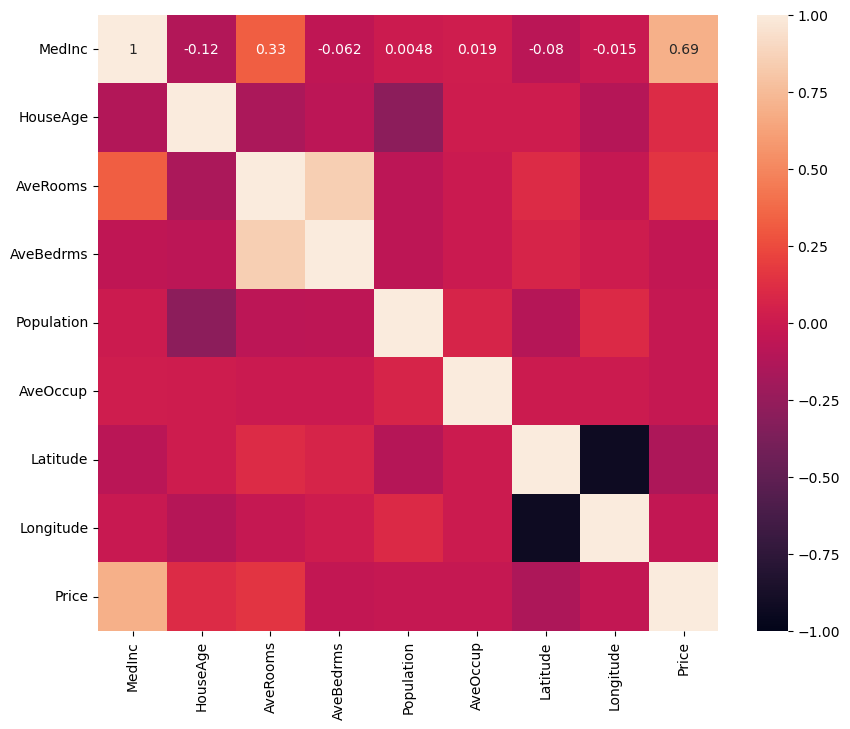

In [27]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, vmin = -1, vmax =1)
# vmax and vmin ---> here we puting limit of correction - means band start from -1 to 1


In [ ]:
# -1 means highest  correlated on negative side or inverse correlated 
# 1 means highest positive  correlated  or direct  correlated 
# if it is close to zero from -ve side or +ve side it means -- least correlation 

In [30]:
# ClusterMap >> this table show group(cluster ) relationships 

<Figure size 500x500 with 0 Axes>

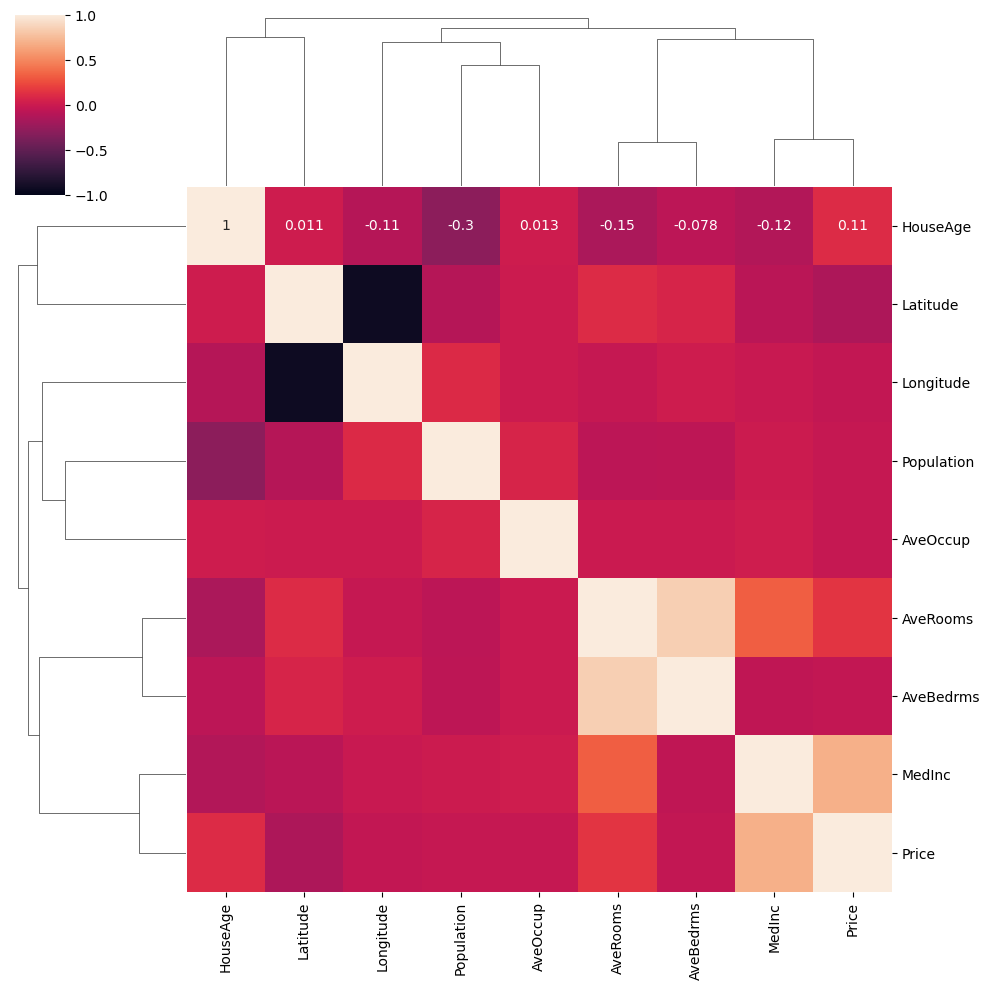

In [32]:
plt.figure(figsize=(5,5))

sns.clustermap(df.corr(), vmin = -1, vmax = 1,annot=True)

In [33]:
# VIF

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif = pd.DataFrame() # it give me empty dataframe 
vif['Feature'] = df.columns # now i give it name 'Feature' and here we made a dataframe with only columns name 
vif


In [38]:
# now how to calculate VIF

In [43]:
vif["VIF"] = [variance_inflation_factor(df.values,i) for i in range(len(df.columns))]
    

In [44]:
vif

,Feature,VIF
0,MedInc,19.624998
1,HouseAge,7.592663
2,AveRooms,47.956351
3,AveBedrms,45.358192
4,Population,2.936078
5,AveOccup,1.099530
6,Latitude,568.497332
7,Longitude,640.064211
8,Price,9.285659


In [47]:
df1 = df.copy()

In [49]:
df1.drop("Longitude",axis=1,inplace=True)

In [50]:
df1

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,3.422
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,0.847


In [51]:
vif = pd.DataFrame() 
vif['Feature'] = df1.columns
vif["VIF"] = [variance_inflation_factor(df1.values,i) for i in range(len(df1.columns))]


In [52]:
vif

,Feature,VIF
0,MedInc,18.639889
1,HouseAge,7.346583
2,AveRooms,44.714760
3,AveBedrms,42.072000
4,Population,2.796280
5,AveOccup,1.099394
6,Latitude,22.873934
7,Price,9.193500


In [53]:
df1.drop("AveRooms",axis=1,inplace=True)
vif = pd.DataFrame() 
vif['Feature'] = df1.columns
vif["VIF"] = [variance_inflation_factor(df1.values,i) for i in range(len(df1.columns))]

In [54]:
vif

,Feature,VIF
0,MedInc,10.584081
1,HouseAge,7.260588
2,AveBedrms,6.440667
3,Population,2.762794
4,AveOccup,1.098719
5,Latitude,22.094483
6,Price,8.674858


In [55]:
df1.drop("Latitude",axis=1,inplace=True)
vif = pd.DataFrame() 
vif['Feature'] = df1.columns
vif["VIF"] = [variance_inflation_factor(df1.values,i) for i in range(len(df1.columns))]

In [56]:
vif

,Feature,VIF
0,MedInc,8.855104
1,HouseAge,4.156145
2,AveBedrms,4.264253
3,Population,2.223926
4,AveOccup,1.098671
5,Price,8.607339


In [58]:
df1 # build the model 

,MedInc,HouseAge,AveBedrms,Population,AveOccup,Price
0,8.3252,41.0,1.023810,322.0,2.555556,4.526
1,8.3014,21.0,0.971880,2401.0,2.109842,3.585
2,7.2574,52.0,1.073446,496.0,2.802260,3.521
3,5.6431,52.0,1.073059,558.0,2.547945,3.413
4,3.8462,52.0,1.081081,565.0,2.181467,3.422
...,...,...,...,...,...,...
20635,1.5603,25.0,1.133333,845.0,2.560606,0.781
20636,2.5568,18.0,1.315789,356.0,3.122807,0.771
20637,1.7000,17.0,1.120092,1007.0,2.325635,0.923
20638,1.8672,18.0,1.171920,741.0,2.123209,0.847


In [74]:
X = df1.iloc[:,:-1] # take all row and all the columns except -1
y = df1.iloc[:,-1] # take row and then -1

In [75]:
X

,MedInc,HouseAge,AveBedrms,Population,AveOccup
0,8.3252,41.0,1.023810,322.0,2.555556
1,8.3014,21.0,0.971880,2401.0,2.109842
2,7.2574,52.0,1.073446,496.0,2.802260
3,5.6431,52.0,1.073059,558.0,2.547945
4,3.8462,52.0,1.081081,565.0,2.181467
...,...,...,...,...,...
20635,1.5603,25.0,1.133333,845.0,2.560606
20636,2.5568,18.0,1.315789,356.0,3.122807
20637,1.7000,17.0,1.120092,1007.0,2.325635
20638,1.8672,18.0,1.171920,741.0,2.123209


In [76]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Price, Length: 20640, dtype: float64

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test =train_test_split(X,y,test_size=0.3,random_state=1)

In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [79]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [80]:
model

LinearRegression()

In [81]:
model.fit(X_train, y_train)


LinearRegression()

In [82]:
y_pred = model.predict(X_test)

In [83]:
y_pred

array([1.99486815, 1.39443153, 2.46691805, ..., 1.83891855, 1.28083607,
       1.20666527])

In [84]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mean_squared_error(y_test, y_pred)

0.6544937093127866

In [85]:
r2_score(y_test, y_pred)

0.5021661718778505

Conclusion Using VIF - Removing mutli-collinearity from the data led to 
less Computation time . thus r^sqr evaluation matrix will be almost same 

In [86]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In the 'AveRooms' , 'Latitude' ,'Longitude' in this columns value are basically 
look like constant . So In this column no variance of value means it is not usefull 

Because In ML step: 
ML---> TO learn patterns --> No any variance ---> No Pattern 

In [89]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [87]:
# RFE >>  recursive feature elimination 

In [88]:
X = df.iloc[:,:-1] 
y = df.iloc[:,-1] 

In [90]:
from sklearn.feature_selection import RFE

In [100]:
rfe = RFE(estimator=LinearRegression(),n_features_to_select=6)

In [101]:
rfe.fit(X,y)

RFE(estimator=LinearRegression(), n_features_to_select=6)

In [102]:
rfe.predict(X)

array([4.12430881, 3.97408244, 3.67418638, ..., 0.16610998, 0.31206347,
       0.51242078])

In [103]:
rfe.support_

array([ True,  True,  True,  True, False, False,  True,  True])

In [104]:
# where ever True is their which feature is selected

In [105]:
X.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [106]:
# it is selected by helping of magnitude of coefficient 

In [107]:
rfe.ranking_

array([1, 1, 1, 1, 3, 2, 1, 1])

 1 means selecting and 2 means next important feature for selecting , like wise lastly 

 it is more important for asking to bossiness team to features selected or  droped